## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# import data
df = pd.read_csv('data/visathon_train_data.csv')
df.head()

,customer_id,vintage,age,gender,dependents,occupation,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1.0,3135.0,66.0,Male,0.0,Engineer,Medium,755.0,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,NaN,1458.71,1458.71,Yes
1,6.0,2531.0,42.0,Male,2.0,Engineer,Low,388.0,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,No
2,7.0,263.0,42.0,Female,0.0,Engineer,Medium,1666.0,60.0,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,Yes
3,8.0,5922.0,72.0,Male,0.0,Lawyer,High,1.0,98.0,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,Yes
4,9.0,1145.0,46.0,Male,0.0,Engineer,Medium,317.0,172.0,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,Yes


In [3]:
# explore categorical variables
print(df['gender'].value_counts())
print()
print(df['occupation'].value_counts())
print()
print(df['customer_nw_category'].value_counts())
print()
print(df['churn'].value_counts())

Male      10760
Female     6894
Name: gender, dtype: int64

Engineer      10658
Accountant     4418
Lawyer         1298
Doctor         1081
Chef             17
Name: occupation, dtype: int64

Medium    8943
Low       6214
High      2497
Name: customer_nw_category, dtype: int64

Yes    14174
No      3480
Name: churn, dtype: int64


In [4]:
# create dummies
df = pd.concat([df, pd.get_dummies(df[['gender', 'occupation', 'customer_nw_category']])], axis=1)

df.head()

,customer_id,vintage,age,gender,dependents,occupation,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,gender_Female,gender_Male,occupation_Accountant,occupation_Chef,occupation_Doctor,occupation_Engineer,occupation_Lawyer,customer_nw_category_High,customer_nw_category_Low,customer_nw_category_Medium
0,1.0,3135.0,66.0,Male,0.0,Engineer,Medium,755.0,224.0,1458.71,...,0,1,0,0,0,1,0,0,0,1
1,6.0,2531.0,42.0,Male,2.0,Engineer,Low,388.0,58.0,927.72,...,0,1,0,0,0,1,0,0,1,0
2,7.0,263.0,42.0,Female,0.0,Engineer,Medium,1666.0,60.0,15202.20,...,1,0,0,0,0,1,0,0,0,1
3,8.0,5922.0,72.0,Male,0.0,Lawyer,High,1.0,98.0,7006.93,...,0,1,0,0,0,0,1,1,0,0
4,9.0,1145.0,46.0,Male,0.0,Engineer,Medium,317.0,172.0,10096.58,...,0,1,0,0,0,1,0,0,0,1


In [5]:
# set churn to one hot encoding
df.drop(['gender', 'occupation', 'customer_nw_category'], axis=1, inplace=True)

for i in df.index:
    if df.loc[i,'churn'] == 'Yes':
        df.loc[i,'churn'] = 1
    else:
        df.loc[i,'churn'] = 0

df.head()

,customer_id,vintage,age,dependents,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,gender_Female,gender_Male,occupation_Accountant,occupation_Chef,occupation_Doctor,occupation_Engineer,occupation_Lawyer,customer_nw_category_High,customer_nw_category_Low,customer_nw_category_Medium
0,1.0,3135.0,66.0,0.0,755.0,224.0,1458.71,1458.71,1458.71,1449.07,...,0,1,0,0,0,1,0,0,0,1
1,6.0,2531.0,42.0,2.0,388.0,58.0,927.72,1401.72,1643.31,1871.12,...,0,1,0,0,0,1,0,0,1,0
2,7.0,263.0,42.0,0.0,1666.0,60.0,15202.20,16059.34,15211.29,13798.82,...,1,0,0,0,0,1,0,0,0,1
3,8.0,5922.0,72.0,0.0,1.0,98.0,7006.93,7714.19,7859.74,11232.37,...,0,1,0,0,0,0,1,1,0,0
4,9.0,1145.0,46.0,0.0,317.0,172.0,10096.58,8519.53,6511.82,16314.17,...,0,1,0,0,0,1,0,0,0,1


In [6]:
df.describe()

,customer_id,vintage,age,dependents,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,gender_Female,gender_Male,occupation_Accountant,occupation_Chef,occupation_Doctor,occupation_Engineer,occupation_Lawyer,customer_nw_category_High,customer_nw_category_Low,customer_nw_category_Medium
count,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,1.693900e+04,1.765400e+04,1.765400e+04,17654.000000,...,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000
mean,12087.904044,2548.803274,47.963011,0.376629,875.724708,67.044579,7.168881e+03,7.222929e+03,7.194549e+03,6723.439337,...,0.390506,0.609494,0.250255,0.000963,0.061233,0.603716,0.073524,0.141441,0.351988,0.506571
std,6987.684541,1599.755612,16.422730,1.063252,903.755183,83.983477,2.055108e+04,2.089998e+04,1.914165e+04,17403.866869,...,0.487878,0.487878,0.433172,0.031017,0.239763,0.489139,0.261003,0.348486,0.477604,0.499971
min,1.000000,180.000000,1.000000,0.000000,1.000000,0.000000,-5.503960e+03,-3.145380e+03,1.428690e+03,-16506.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6017.250000,1320.000000,36.000000,0.000000,158.000000,11.000000,1.778495e+03,1.907295e+03,2.205062e+03,1818.735000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12109.500000,2205.000000,46.000000,0.000000,538.000000,28.000000,3.335280e+03,3.432845e+03,3.590405e+03,3391.805000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,18131.750000,3377.750000,60.000000,0.000000,1375.000000,90.000000,6.820100e+03,6.882498e+03,6.868970e+03,6663.795000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,24212.000000,11353.000000,90.000000,52.000000,4782.000000,365.000000,1.076091e+06,1.001124e+06,1.192704e+06,856596.510000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


180.0 11353.0
1117.3


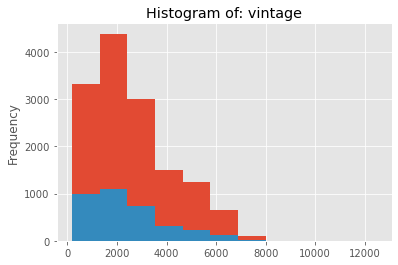

In [7]:
# explore values
def show_hist(data, col, bin_count, custom_max):
    if custom_max == False:
        max = data[col].max()
    else:
        max = custom_max

    min = data[col].min()
    print(min,max)
    bin_size = (max - min) / bin_count
    print(bin_size)
    bin_shape = range(int(min), int(max + bin_size), int(bin_size))

    data[data['churn'] == 1][col].plot(kind='hist', bins=bin_shape)
    data[data['churn'] == 0][col].plot(kind='hist', bins=bin_shape)

    plt.title('Histogram of: ' + col)

show_hist(df, 'vintage', 10, custom_max=False)

Text(0.5, 1.0, 'Current Balance v. Last Month Balance')

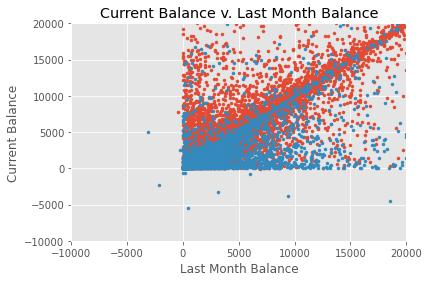

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x=df[df['churn'] == 1]['previous_month_end_balance'], y=df[df['churn'] == 1]['current_balance'], marker='.')
ax1.scatter(x=df[df['churn'] == 0]['previous_month_end_balance'], y=df[df['churn'] == 0]['current_balance'], marker='.')

plt.xlim(-10000,20000)
plt.ylim(-10000,20000)
plt.xlabel('Last Month Balance')
plt.ylabel('Current Balance')
plt.title('Current Balance v. Last Month Balance')

Text(0.5, 1.0, 'Change in Account Balance Hist')

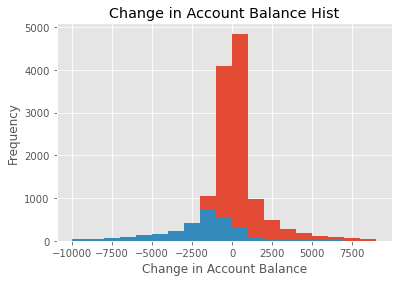

In [9]:
df['last_month_balance_change'] = df['current_balance'] - df['previous_month_end_balance']
df['last_Q_balance_change'] = df['current_balance'] - df['average_monthly_balance_prevQ']

df[df['churn'] == 1]['last_Q_balance_change'].plot(kind='hist', bins=range(-10000, 10000, 1000))
df[df['churn'] == 0]['last_Q_balance_change'].plot(kind='hist', bins=range(-10000, 10000, 1000))

plt.xlabel('Change in Account Balance')
plt.title('Change in Account Balance Hist')

Observations:
* Many categories have similar distributions of churn v. no churn across their ranges
* There are a few outliers when it comes to account ballance that may skew the data, or make regression methodes difficult
* There are in general more customers churning than not, which seems strange
* Churn is much much lower amoung customers who have debts (negative current ballance)
* I suspect that customers who have just gotten out of debt will have a higher rate of churn
* Customers that have recently experienced a drop in thier account balacne are the least likely to churn... does this make sense?

## Exploratory Modeling Attempts

In [10]:
df.columns

Index(['customer_id', 'vintage', 'age', 'dependents', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'gender_Female', 'gender_Male', 'occupation_Accountant',
       'occupation_Chef', 'occupation_Doctor', 'occupation_Engineer',
       'occupation_Lawyer', 'customer_nw_category_High',
       'customer_nw_category_Low', 'customer_nw_category_Medium',
       'last_month_balance_change', 'last_Q_balance_change'],
      dtype='object')

In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

factors = ['vintage', 'age', 'dependents', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance',
       'gender_Female', 'gender_Male', 'occupation_Accountant',
       'occupation_Chef', 'occupation_Doctor', 'occupation_Engineer',
       'occupation_Lawyer', 'customer_nw_category_High',
       'customer_nw_category_Low', 'customer_nw_category_Medium',
       'last_month_balance_change', 'last_Q_balance_change']

scale = MinMaxScaler().fit(np.asarray(df[factors]))
scaled_data = scale.transform( np.asarray(df[factors]))

data = pd.DataFrame({'churn': df['churn']})
data['churn'] = pd.to_numeric(data['churn']).astype('int32')

for i,cols in enumerate(factors):
    data[cols] = list(scaled_data[:,i])

print(data.shape)

data.fillna(0.0)
data.dropna()

print(data.shape)

x_data = np.asarray(data[factors])
y_data = np.asarray(data['churn'])

x_data = np.nan_to_num(x_data)
y_data = np.nan_to_num(y_data)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=42)


(17654, 28)
(17654, 28)


Notes:
* Right now the model is simply ignoring rows with missing data (about 2,300 of them). I don't know if the full testing data set has missing values, so I will circle back to this if needed

Updates:
* Converting Nans to 0 instead of droping them increased the accuracy quite a bit!

In [50]:
# model churn using KNN clasification
from sklearn.neighbors import KNeighborsClassifier

n_scores = pd.DataFrame({'n_value':[3,5,8,12,20,30,50,60,70,100]})

for i,n in enumerate(n_scores['n_value']):
    model = KNeighborsClassifier(n_neighbors=n, weights='uniform')
    model.fit(x_train, y_train)
    y_hat = model.predict(x_test)
    n_scores.loc[i,'score'] = metrics.accuracy_score(y_hat, y_test)

n_scores

,n_value,score
0,3,0.749670
1,5,0.777421
2,8,0.778365
3,12,0.796677
4,20,0.804984
5,30,0.806683
6,50,0.807438
7,60,0.807438
8,70,0.807438
9,100,0.807438


Observations:
* Regardless of whether uniform or distance weights are used, it seems that 0.797 is the best accuracy score achieveable.
* The accuracy is better with a higher n_value, but stops improving after 50

In [51]:
# model churn using LogReg clasification
from sklearn.linear_model import LogisticRegression

solver_scores = pd.DataFrame({'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']})

for i,solvers in enumerate(solver_scores['solver']):
    model = LogisticRegression(C=10000, solver=solvers, max_iter=100000)
    model.fit(x_train, y_train)
    y_hat = model.predict(x_test)
    solver_scores.loc[i,'score'] = metrics.accuracy_score(y_hat, y_test)

solver_scores

,solver,score
0,newton-cg,0.812347
1,lbfgs,0.812158
2,liblinear,0.812158
3,sag,0.811969
4,saga,0.811969


Observations:
* An acuracy of 0.797 was reached by all solvers
* At higher C values, newtone_cg and lbfgs started to perform better
* In general higher C values improve the performance of the model
* With a C of 100, and 1000 iterations, 0.803 became the limit
* With a C of 1000, and 10000 iterations, 0.808 became the limit
* The overall best performer was newton_cg with a c of 10000

In [76]:
# model churn using NeuralNet clasification
from sklearn.neural_network import MLPClassifier

value_scores = pd.DataFrame({'value':[(3,3), (4,3), (5,3)]})

for i,values in enumerate(value_scores['value']):
    model = MLPClassifier( activation='logistic', solver='lbfgs', alpha= 0.0001, hidden_layer_sizes=values, random_state=1, max_iter=10000)
    model.fit(x_train, y_train)
    y_hat = model.predict(x_test)
    value_scores.loc[i,'score'] = metrics.accuracy_score(y_hat, y_test)

value_scores

,value,score
0,"(3, 3)",0.799349
1,"(4, 3)",0.854291
2,"(5, 3)",0.851883


Observations:
* Right off the bat lower alpha values perform best, and it looks like this will be a better classifier (0.803)
* With the initial configuration, 0.805 was the best score, and it looks like aphpa values below 0.001 don't improve anything
* lbfgs appears to be the best solver (0.809) with an alpha of 0.0001
* A hiden layer configuratin of (5,3) works best (0.809)
* Dang, ok, using logistic activation caused the score to syrocket to 0.842!
* And now (4,3) looks like the best hidden layer structure (0.847)

Finally, after updating how nans are handled, the score increased to 0.854

In [113]:
# model churn using gradient boost clasification
from sklearn.ensemble import GradientBoostingClassifier

value_scores = pd.DataFrame({'value':[200,300,500,1000]})

for i,values in enumerate(value_scores['value']):
    model = GradientBoostingClassifier(n_estimators=values, learning_rate=0.3, max_depth=1, random_state=0)
    model.fit(x_train, y_train)
    y_hat = model.predict(x_test)
    value_scores.loc[i,'score'] = metrics.accuracy_score(y_hat, y_test)

value_scores

,value,score
0,200,0.854432
1,300,0.855990
2,500,0.856698
3,1000,0.856273


Observations:
* Gradient boost works great, the base score was 0.854!
* By increasing the n_estimators value, that increased to 0.856


In [114]:
# try the best model with a few differnt train / test splits
state_scores = pd.DataFrame({'split':range(0,10)})

for i,values in enumerate(state_scores['split']):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4, random_state=values)

    model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.3, max_depth=1, random_state=0)
    model.fit(x_train, y_train)
    y_hat = model.predict(x_test)
    state_scores.loc[i,'score'] = metrics.accuracy_score(y_hat, y_test)

state_scores

,split,score
0,0,0.849476
1,1,0.850750
2,2,0.850326
3,3,0.851175
4,4,0.849334
5,5,0.847494
6,6,0.849193
7,7,0.860379
8,8,0.858822
9,9,0.856698


In [115]:
state_scores['score'].mean()

0.8523647691871992

Notes:
* Across a variety of train / test splits, the neural net model performed very consistant (0.850). Time to deploy and see if droping the NA data becomes a problem
* Switching from a neural net to gradient boost improved this to 0.852

## Implementing the Best Model (GradientBoost)

In [17]:
# import and shape test data
df_test = pd.read_csv('data/visathon_test_data.csv')
df_test.head()

,customer_id,vintage,age,gender,dependents,occupation,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,24213,3110,45,Male,2,Engineer,Medium,1105,38,17184.62,976.75,3341.16,7358.64,0.16,941.01,9563.63,1427.20,6888.66,1459.06,NaN
1,24214,6940,36,Female,0,Accountant,Low,32,6,1400.41,1030.16,2762.40,2875.89,583.39,371.96,301.51,343.67,1118.33,3432.06,NaN
2,24215,2798,41,Female,0,Engineer,Medium,275,40,4594.92,5096.48,3319.14,3324.49,0.61,3431.33,430.74,186.33,4884.03,3077.03,NaN
3,24216,1726,36,Male,2,Accountant,Medium,129,27,23277.33,22450.44,23447.36,17403.04,1716.80,1685.19,1616.54,2711.36,23636.75,23473.28,NaN
4,24218,2100,54,Female,0,Engineer,Medium,8,199,9184.20,9184.20,9184.20,9132.61,0.24,0.24,0.24,0.24,9184.20,9184.20,NaN


In [18]:
# create dummies
df_test = pd.concat([df_test, pd.get_dummies(df_test[['gender', 'occupation', 'customer_nw_category']])], axis=1)
df_test.drop(['gender', 'occupation', 'customer_nw_category'], axis=1, inplace=True)

df_test.head()

,customer_id,vintage,age,dependents,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,...,gender_Female,gender_Male,occupation_Accountant,occupation_Chef,occupation_Doctor,occupation_Engineer,occupation_Lawyer,customer_nw_category_High,customer_nw_category_Low,customer_nw_category_Medium
0,24213,3110,45,2,1105,38,17184.62,976.75,3341.16,7358.64,...,0,1,0,0,0,1,0,0,0,1
1,24214,6940,36,0,32,6,1400.41,1030.16,2762.40,2875.89,...,1,0,1,0,0,0,0,0,1,0
2,24215,2798,41,0,275,40,4594.92,5096.48,3319.14,3324.49,...,1,0,0,0,0,1,0,0,0,1
3,24216,1726,36,2,129,27,23277.33,22450.44,23447.36,17403.04,...,0,1,1,0,0,0,0,0,0,1
4,24218,2100,54,0,8,199,9184.20,9184.20,9184.20,9132.61,...,1,0,0,0,0,1,0,0,0,1


In [25]:
# add two derived columns
df_test['last_month_balance_change'] = df_test['current_balance'] - df_test['previous_month_end_balance']
df_test['last_Q_balance_change'] = df_test['current_balance'] - df_test['average_monthly_balance_prevQ']

In [63]:
# replace nans with 0.0
scaled_data_test = scale.transform(np.asarray(df_test[factors]))

data_test = pd.DataFrame({'customer_id': df_test['customer_id']})

for i,cols in enumerate(factors):
    data_test[cols] = list(scaled_data_test[:,i])

print(data_test.shape)

data_test.fillna(0.0)
data_test.dropna()

print(data_test.shape)

x_data_test = np.asarray(data_test[factors])

x_data_test = np.nan_to_num(x_data_test)

(4413, 28)
(4413, 28)


In [116]:
# train the tuned model and record the results
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.3, max_depth=1, random_state=0)
model.fit(x_data, y_data)
y_hat_test = model.predict(x_data_test)

res = pd.DataFrame({'customer_id': df_test['customer_id'], 'churn': y_hat_test})
res.set_index('customer_id', drop=True, inplace=True)

res.head()

,churn
customer_id,
24213,1
24214,1
24215,1
24216,1
24218,1


In [117]:
# check to see if the churn percentages seem correct
print('Percent churn for training data:', df['churn'].value_counts()[1] / df.shape[0])
print('Percent churn for predictions data:',res['churn'].value_counts()[1] / res.shape[0])

Percent churn for training data: 0.8028775348362978
Percent churn for predictions data: 0.8776342624065262


In [94]:
# export results
res.to_csv('data/results_2022_0325_1421.csv')

Observations:
* The model predicted a noticeably higher percentage of churn than the test data, but that is not necessarily a problem
* At first the predicted value was 0.854... I would like to get it lower than that

Notes:
* To do that, I am going to try a differnt method for predicting churn. The idea is to find the probabilities first, and then adjust the threshold probability until the predicted ratio matches the test ratio
* I also switched from using a neural net to a gradient boost algorithm because it ended up working better

In [121]:
# predict the probability for each result
model = GradientBoostingClassifier(n_estimators=500, learning_rate=0.3, max_depth=1, random_state=0)
model.fit(x_data, y_data)
y_prob = model.predict_proba(x_data_test)[:,1]

prob = pd.DataFrame({'customer_id': df_test['customer_id'], 'prob': y_prob})
prob.set_index('customer_id', drop=True, inplace=True)

# adjust the threshold for what counts as a positive result until the predicted ratio matches the expected ratio
target_ratio = df['churn'].value_counts()[1] / df.shape[0]

threshold = 0.6
i = 0
while i < 10:

    for j in prob.index:
        if prob.loc[j,'prob'] > threshold:
            prob.loc[j,'churn'] = int(1)
        else:
            prob.loc[j,'churn'] = int(0)

    predicted_ratio = prob['churn'].value_counts()[1] / prob.shape[0]
    print(predicted_ratio)

    if predicted_ratio > target_ratio:
        threshold = threshold + 0.01
    else:
        threshold = threshold - 0.01
    
    i = i + 1

prob.head()

0.8354860639021074
0.8302741898934964
0.8271017448447768
0.822569680489463
0.8178110129163834
0.8130523453433038
0.8080670745524586
0.8035350101971448
0.7994561522773623
0.8035350101971448


,prob,churn
customer_id,,
24213,0.886349,1.0
24214,0.748737,1.0
24215,0.933861,1.0
24216,0.949039,1.0
24218,0.953016,1.0


In [120]:
# export results
prob.drop('prob', axis=1, inplace=True)
prob.to_csv('data/results_2022_0325_1509.csv')